In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [2]:
data = pd.read_csv("../data/crabs.csv") 
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4

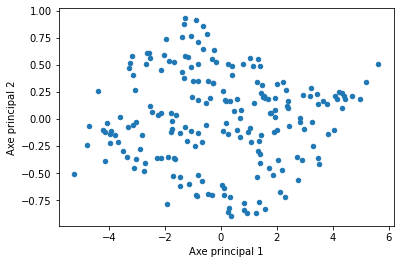

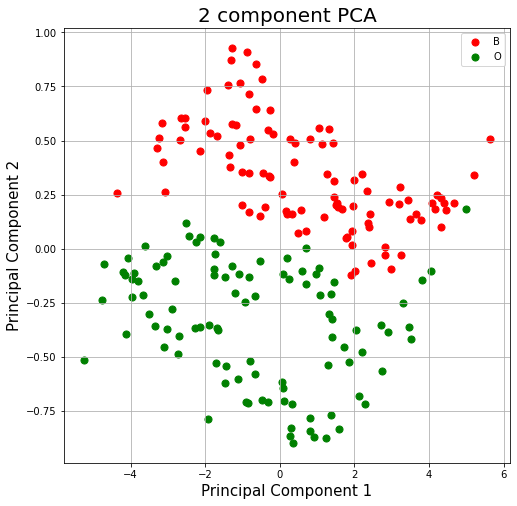

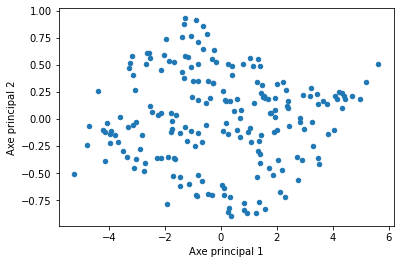

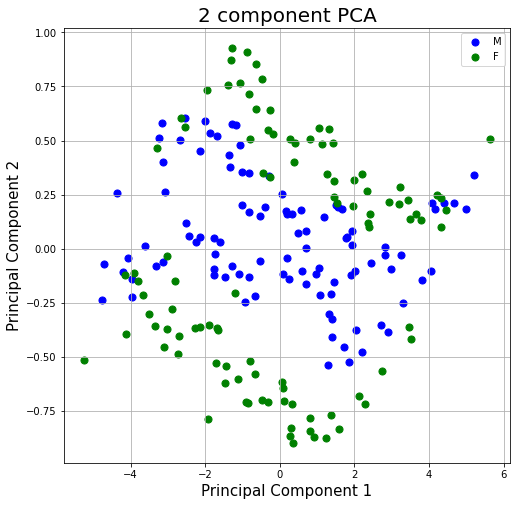

In [3]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("../data/crabs.csv") 
data.head(2)

data["sp"].unique()

data["sex"].unique()

x = data.iloc[:,3:9].values
x

Y_sep= data.iloc[:,1:2].values
Y_sep

Y_sex= data.iloc[:,2:3].values
Y_sex

Y_sex_sep= data.iloc[:,1:3].values
Y_sex_sep

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

finaldf = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldf.head(2)

import matplotlib.pyplot as plt
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf['sp'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


finaldf2 = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf2.head(2)

import matplotlib.pyplot as plt
finaldf2.plot.scatter(x='Axe principal 1', y='Axe principal 2')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['b', 'g']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf2['sex'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf2.loc[indicesToKeep, 'Axe principal 1']
               , finaldf2.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



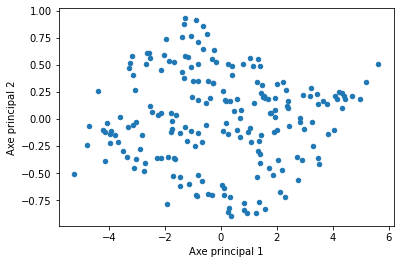

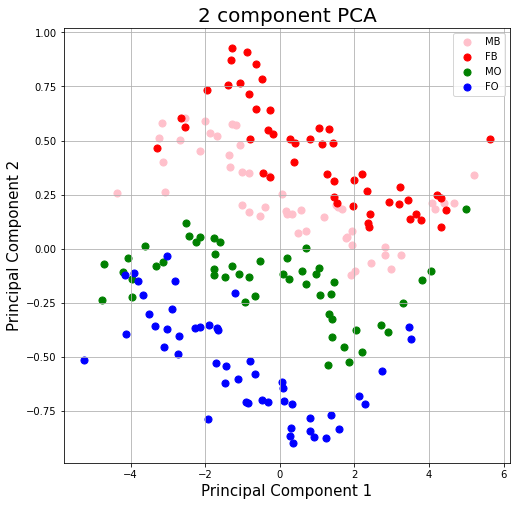

In [4]:
liste = data['sex']+data['sp']
liste
data.assign(spex=0)
data["spex"]=liste
data["spex"]

finaldf3 = pd.concat([principaldf, data["spex"]], axis = 1)
finaldf3.head(2)

import matplotlib.pyplot as plt
finaldf2.plot.scatter(x='Axe principal 1', y='Axe principal 2')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MB', 'FB', 'MO', 'FO']
colors = ['pink','r','g','b']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf3["spex"] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf3.loc[indicesToKeep, 'Axe principal 1']
               , finaldf3.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
